### Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import pydot
from IPython.display import Image
import os
from dtreeviz.trees import dtreeviz

### Loading the Dataset

In [2]:
!cat agaricus-lepiota.names

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [3]:
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


According to the dataset's documentation, all missing values are in feature 11 which is stalk-root. Since there are 2480 missing values in this column and the entire dataset has a total of 8124 entries, dropping the column entirely is favorable as to filling the na values may skew classification.

In [4]:
# Drop stalk-root as it contains a large number of missing values
mushrooms = mushrooms.drop(columns = ['stalk-root'])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# All variables are categorical so we need to convert them to dummy variables
mushrooms_dummy = pd.get_dummies(mushrooms)
mushrooms_dummy.sample(10, random_state=1)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1392,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4051,0,1,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
3725,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7177,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
103,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3371,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
6738,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1525,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5838,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4299,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### Exploratory Data Analysis

In [6]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

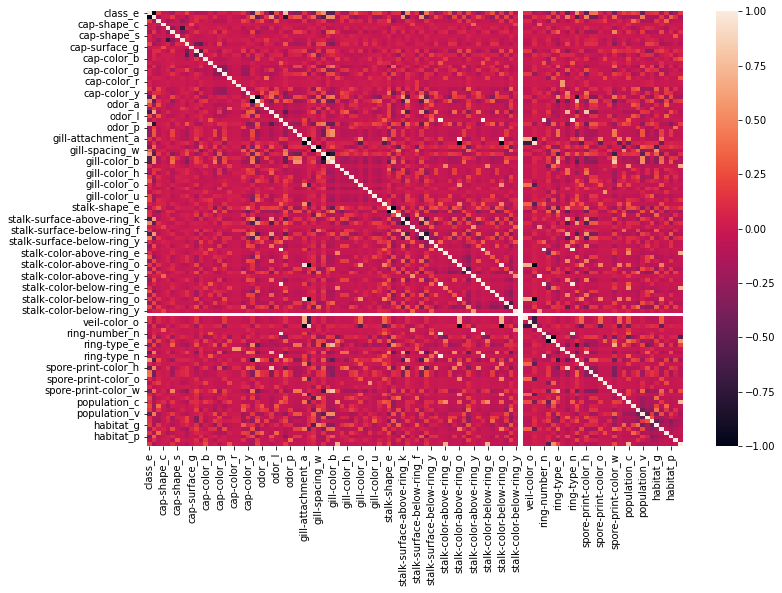

In [7]:
# Correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(mushrooms_dummy.corr())
plt.show()

In [8]:
# subset the dataframe into dependent and independent variables, where toxicity is the dependent variable
labels = ['class_e', 'class_p']
features = [feat for feat in mushrooms_dummy.columns if feat not in labels]

y = mushrooms_dummy[labels[0]] # edible shrooms will be 1, poisonous will be 0
x = mushrooms_dummy[features]

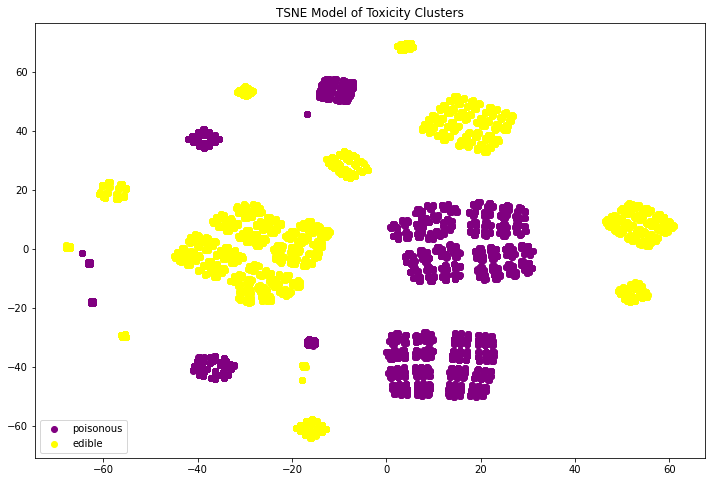

In [9]:
# create TSNE model
tsne_model = TSNE(init='random', learning_rate=100)

# fit model to the data's independent variables
transformed = tsne_model.fit_transform(x.values)
xs = transformed[:,0]
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs':xs, 'ys':ys})

# create EDA plot
plt.figure(figsize=(12,8))
plt.title('TSNE Model of Toxicity Clusters')
plt.scatter(df_trans.loc[y==0]['xs'], df_trans.loc[y ==0]['ys'], c= 'purple')
plt.scatter(df_trans.loc[y ==1]['xs'], df_trans.loc[y ==1]['ys'], c= 'yellow')
plt.legend(loc ='lower left', labels = ['poisonous', 'edible'])

# display plot
plt.show()

### Classification

#### Decision Tree Classification

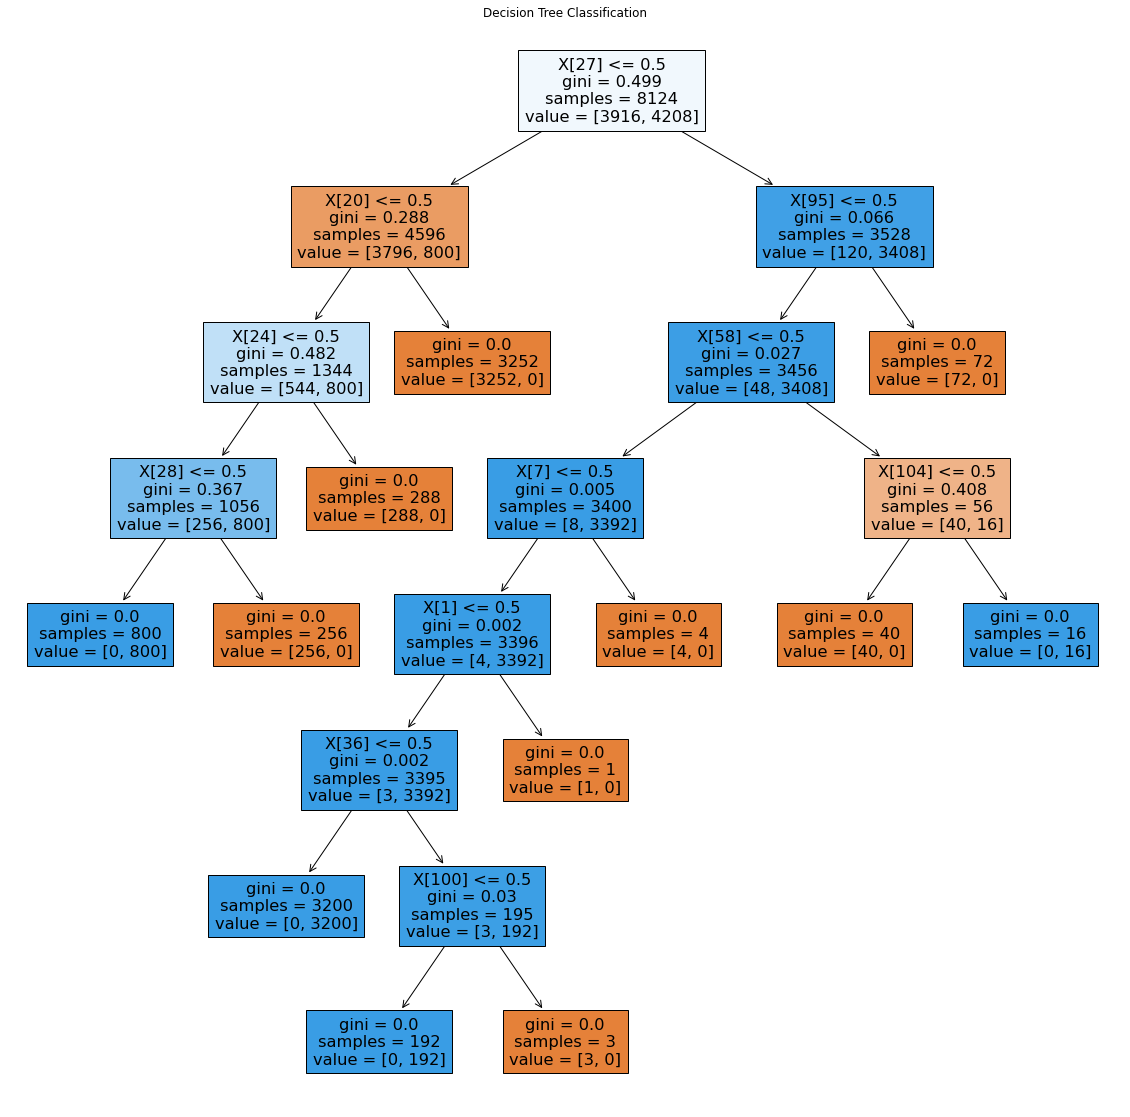

In [14]:
plt.figure(figsize=(20,20))
dt = DecisionTreeClassifier().fit(x,y)
plot_tree(dt, filled=True)
plt.title("Decision Tree Classification")
plt.show()

#### Random Forest Classification

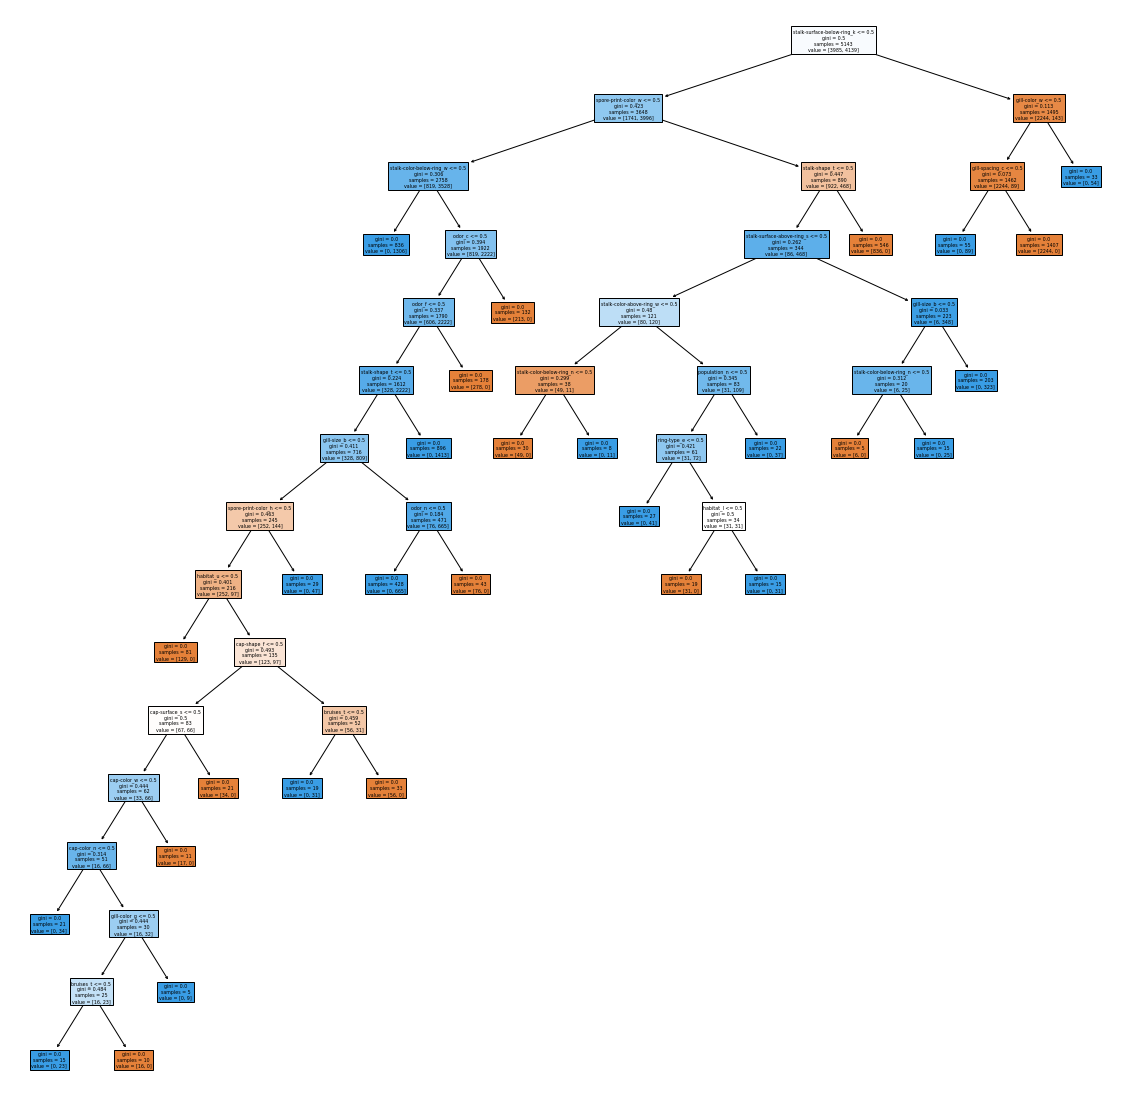

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=1).fit(x, y)
plt.figure(figsize= (20,20))
fig = tree.plot_tree(rf.estimators_[0], feature_names=x.columns, filled=True)
plt.savefig("rf_tree.png")

### Conclusions

The mushrooms can be decided by navigating through the above tree. Decisions can then be made to include or exclude the specific mushroom based on visual appeal, toxicity, and odor. Repeat the process until the desired number of mushrooms has been met.

If using the decision tree model, you could end up with as many as 8 different mushrooms should you navigate the entire tree.

If using the random forest model, then you could end up with many more possibilities with the number of mushhrooms being as low as 3 and as high as 16.

One can then incorporate their own preferences by deciding to take a chance on toxicity, or to not care about visual appeal by chopping the mushroom small enough that it doesn't matter as much, and focus on taste.